In [1]:
import osmnx as ox
import networkx as nx
import json
import shapely.wkt
from shapely.geometry import LineString

# Load preprocessed house nodes
with open('./houseNodes.json', encoding='utf-8') as f:
    houseRawNodes=json.load(f)
    
for house in houseRawNodes:
    if type(house['geometry']) == str:
        house['geometry'] = shapely.wkt.loads(house['geometry'])
    if type(house['toGeometry']) == str:
        house['toGeometry'] = shapely.wkt.loads(house['toGeometry'])

In [17]:
form = int(houseRawNodes[0]["osmid"])
to = int(houseRawNodes[10]["osmid"])

In [3]:
G = ox.save_load.load_graphml('omsk.graphml')

In [19]:
new_edges = []

for house in houseRawNodes:
    if house['geometry'].y > 55.15:
        continue
    
    new_edges.append({

        "from": house['closest'], 
        "to": house['osmid'], 
        "geometry": LineString([(house['geometry'].x, house['geometry'].y), (house['toGeometry'].x, house['toGeometry'].y)]),
        
        "key": 0,
        "107413303": 0,
        "name": None,
        "highway": "residential",
        "oneway": False, 
        "length": 0, 
        "highway": "projected_footway",
        "ref": None,
        "maxspeed": None,
        "lanes": None,
        "bridge": None,
        "junction": None,
        "service": None,
        "tunnel": None,
        "access": None,
        "width": None,
    })
    
for edge in new_edges:
    G.add_edge(edge["from"], edge["to"], osmid=0, highway=edge["highway"], oneway=edge["oneway"], length=edge["length"], geometry=edge["geometry"])
    G.add_edge(edge["to"], edge["from"], osmid=0, highway=edge["highway"], oneway=edge["oneway"], length=edge["length"], geometry=edge["geometry"])

In [12]:
new_nodes = []

for house in houseRawNodes:
    if house['geometry'].y > 55.15:
        continue
    
    new_nodes.append({
        "osmid": house['osmid'],
        "geometry": house['geometry'],
        "tag": house['tag'],
        "highway": None,
    })
    
for node in new_nodes:
    G.add_node(node["osmid"], y=node["geometry"].y, x=node["geometry"].x, osmid=node["osmid"], tag=node["tag"])

AtlasView({0: {'osmid': 80908524, 'highway': 'unclassified', 'oneway': False, 'length': 111.125, 'geometry': <shapely.geometry.linestring.LineString object at 0x000002866CDAB6A0>}})

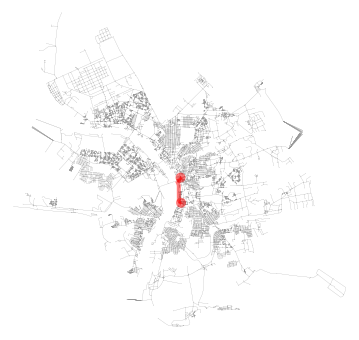

(<Figure size 796.81x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2866b4d22b0>)

In [20]:
route = nx.shortest_path(G, form, to)
ox.plot_graph_route(G, route, edge_linewidth=0.1, node_size=0.2)

In [22]:
G = ox.save_load.save_graphml(G, 'omsk-with-houses.graphml')

AttributeError: 'str' object has no attribute 'copy'